# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction import DictVectorizer
from collections import Counter, OrderedDict
from sklearn import decomposition

#Changing default parameters of graph title and axes
params = {'axes.titlesize':'35',
          'axes.labelsize':'30',
          'xtick.labelsize':'30',
          'ytick.labelsize':'30',
          'legend.fontsize': '30',
          'legend.handlelength': '2'}
matplotlib.rcParams.update(params)

# Load Data

In [2]:
df_final = pd.read_csv('C:/Users/melin/Documents/Springboard Data Science Career Track/Capstone Projects/Capstone Project 1/df_final.csv')
df_final.shape

(61799, 9)

# Reduce Size of Dataset

In [3]:
#Check the value counts of the Event Type (type) column in df_final dataset
df_final['type'].value_counts()

Recall                   56972
Safety alert              3821
Field Safety Notice        992
Recall / Safety Alert       14
Name: type, dtype: int64

In [4]:
#Randomly drop 83% of rows from df_final dataset that contain the "Recall" value under the type column
df_final = df_final.drop(df_final[df_final['type'] == 'Recall'].sample(frac=.83).index)
df_final.shape

(14512, 9)

In [5]:
#Check again the value counts of the Event Type (type) column in df_final dataset
df_final['type'].value_counts()

Recall                   9685
Safety alert             3821
Field Safety Notice       992
Recall / Safety Alert      14
Name: type, dtype: int64

# Apply K-Means Clustering

In [6]:
#Remove rows containing missing values under the clean_reason column 
df_final = df_final[df_final['clean_reason'].notnull()]

# for reproducibility
random_state = 0 

#Compute TF-IDF values to create the feature and X matrices out of the clean_reason column from the df_final dataset
vec = TfidfVectorizer()
vec.fit(df_final.clean_reason.values)
features = vec.transform(df_final.clean_reason.values)
X = vec.fit_transform(df_final.clean_reason)

In [7]:
#Apply the k-means clustering algorithm in vectorized text of cleam_reason column of df_final dataset
true_k = 4 #4 is chosen as the number of clusters since there are 4 event types in the type column in the df_final dataset.
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
#Get the centroids and features
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()

In [9]:
#Print the centroids into which clusters they belong
for i in range(true_k):
 print('Cluster %d:' % i),
 for ind in order_centroids[i, :10]:
     print(' %s' % terms[ind])

Cluster 0:
 may
 result
 use
 product
 patient
 system
 ha
 thi
 potenti
 dure
Cluster 1:
 devic
 affect
 manufactur
 medic
 safeti
 product
 alert
 supplier
 pleas
 ha
Cluster 2:
 steril
 packag
 compromis
 product
 seal
 may
 integr
 pouch
 due
 barrier
Cluster 3:
 featur
 befor
 failur
 devic
 use
 manufactur
 materi
 pack
 compon
 label


# Create K-Means Plot

In [10]:
#Create an instance of KMeans for the plot (4 is chosen as the number of clusters since there are 4 event types - type column - in the df_final dataset.)
cls = MiniBatchKMeans(n_clusters=4, random_state=random_state)
cls.fit(features)

# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([3, 2, 2, ..., 2, 2, 2])

Text(0.5, 1.0, 'Figure 5: K-Means Clustering Results with K=4')

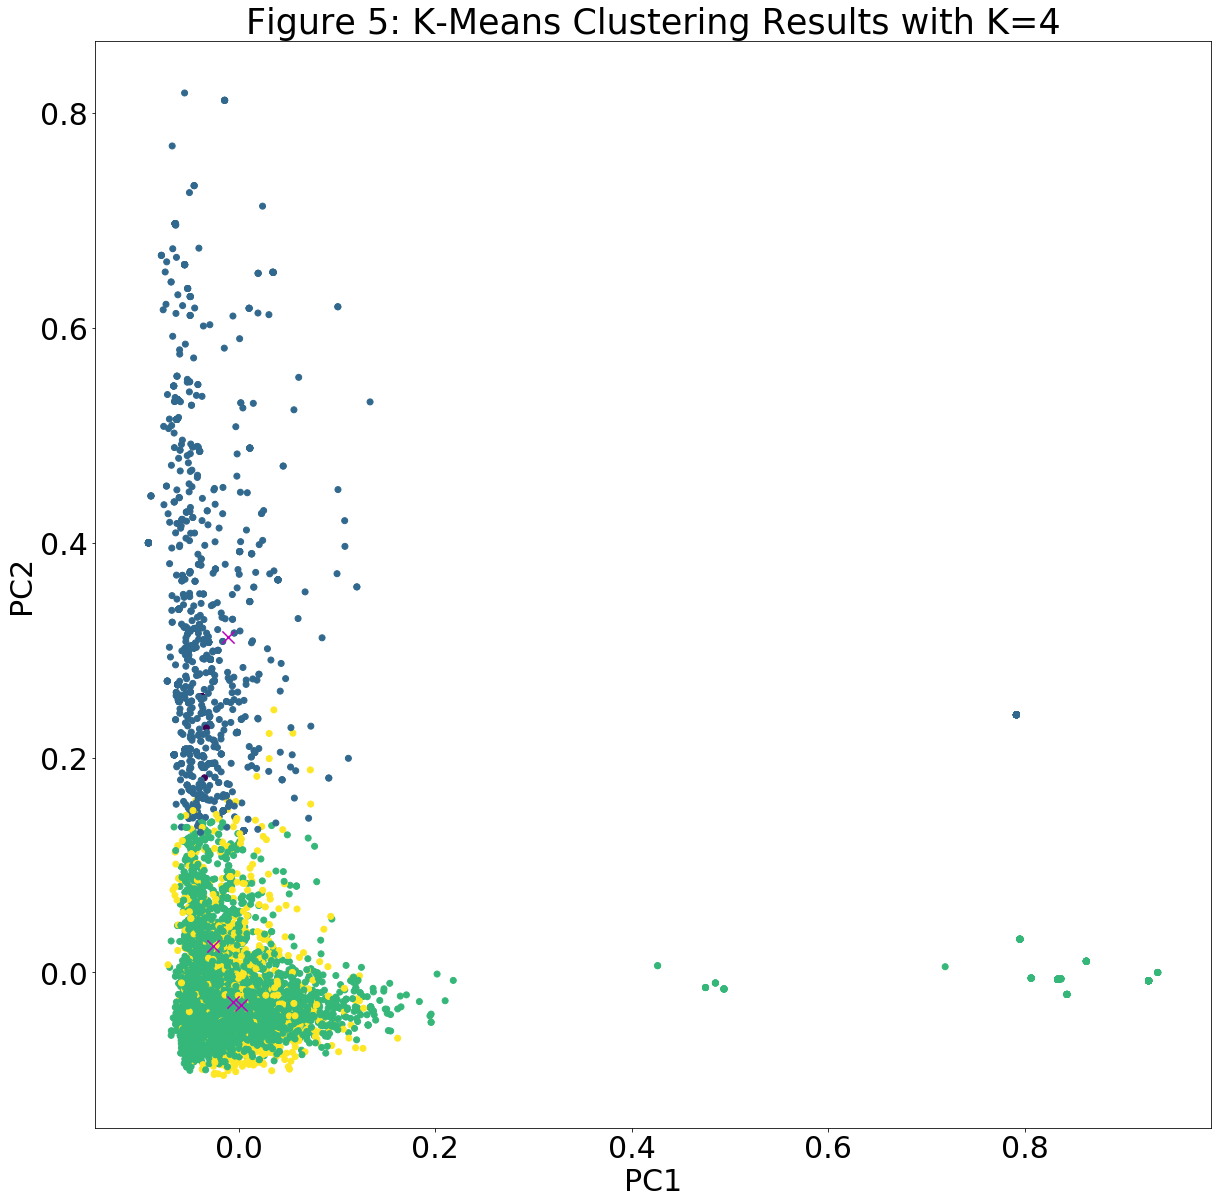

In [11]:
#Create KMeans plot

# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

plt.figure(figsize=(20,20)) 
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='m')

# Add some text for labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Figure 5: K-Means Clustering Results with K=4')

In [12]:
#Use homogeneity score to check how good your clustering model is in Figure 5
homogeneity_score(df_final.type, cls.predict(features))

0.12898579696973184

In [13]:
#Use the Silhouette Coefficient to check how good your clustering model is in Figure 5
silhouette_score(features, labels=cls.predict(features))

0.005514927163579597

# Perform Single Value Decomposition (SVD)

In [14]:
##Use bag-of-words to create a sparse word matrix of the clean_reason column in df_final
v = DictVectorizer()

# discover corpus and vectorize file word frequencies in a single pass
X_S = v.fit_transform(Counter(f) for f in (df_final['clean_reason']))

# X is a sparse matrix, but you can access the A property to get a dense numpy.ndarray 
# representation
print(X_S)
print(X_S.A)

  (0, 0)	33.0
  (0, 1)	14.0
  (0, 2)	6.0
  (0, 3)	14.0
  (0, 4)	8.0
  (0, 5)	19.0
  (0, 6)	7.0
  (0, 7)	2.0
  (0, 8)	1.0
  (0, 9)	20.0
  (0, 12)	9.0
  (0, 13)	9.0
  (0, 14)	8.0
  (0, 15)	14.0
  (0, 16)	6.0
  (0, 17)	1.0
  (0, 18)	17.0
  (0, 19)	9.0
  (0, 20)	20.0
  (0, 21)	10.0
  (0, 22)	3.0
  (0, 24)	1.0
  (1, 0)	28.0
  (1, 1)	14.0
  (1, 2)	4.0
  :	:
  (14507, 22)	5.0
  (14507, 23)	7.0
  (14507, 24)	5.0
  (14508, 0)	32.0
  (14508, 1)	17.0
  (14508, 2)	5.0
  (14508, 3)	16.0
  (14508, 4)	8.0
  (14508, 5)	18.0
  (14508, 6)	4.0
  (14508, 7)	1.0
  (14508, 8)	3.0
  (14508, 9)	21.0
  (14508, 11)	1.0
  (14508, 12)	15.0
  (14508, 13)	3.0
  (14508, 14)	9.0
  (14508, 15)	7.0
  (14508, 16)	2.0
  (14508, 18)	14.0
  (14508, 19)	13.0
  (14508, 20)	17.0
  (14508, 21)	3.0
  (14508, 22)	2.0
  (14508, 23)	1.0
[[33. 14.  6. ...  1.  0.  0.]
 [28. 14.  4. ...  0.  1.  0.]
 [26. 20.  3. ...  0.  2.  0.]
 ...
 [58. 28.  3. ...  1.  1.  0.]
 [62. 21.  2. ...  5.  0.  0.]
 [32. 17.  5. ...  0.  0.  0.]]


In [15]:
#Perform SVD
#Create u, s, and v matrices
u, s, v = np.linalg.svd(X_S.A, full_matrices=True)

In [16]:
#Check shape of u matrix
u.shape

(14509, 14509)

In [17]:
#Check shape of s matrix
s.shape

(27,)

In [18]:
#Check shape of v matrix
v.shape

(27, 27)

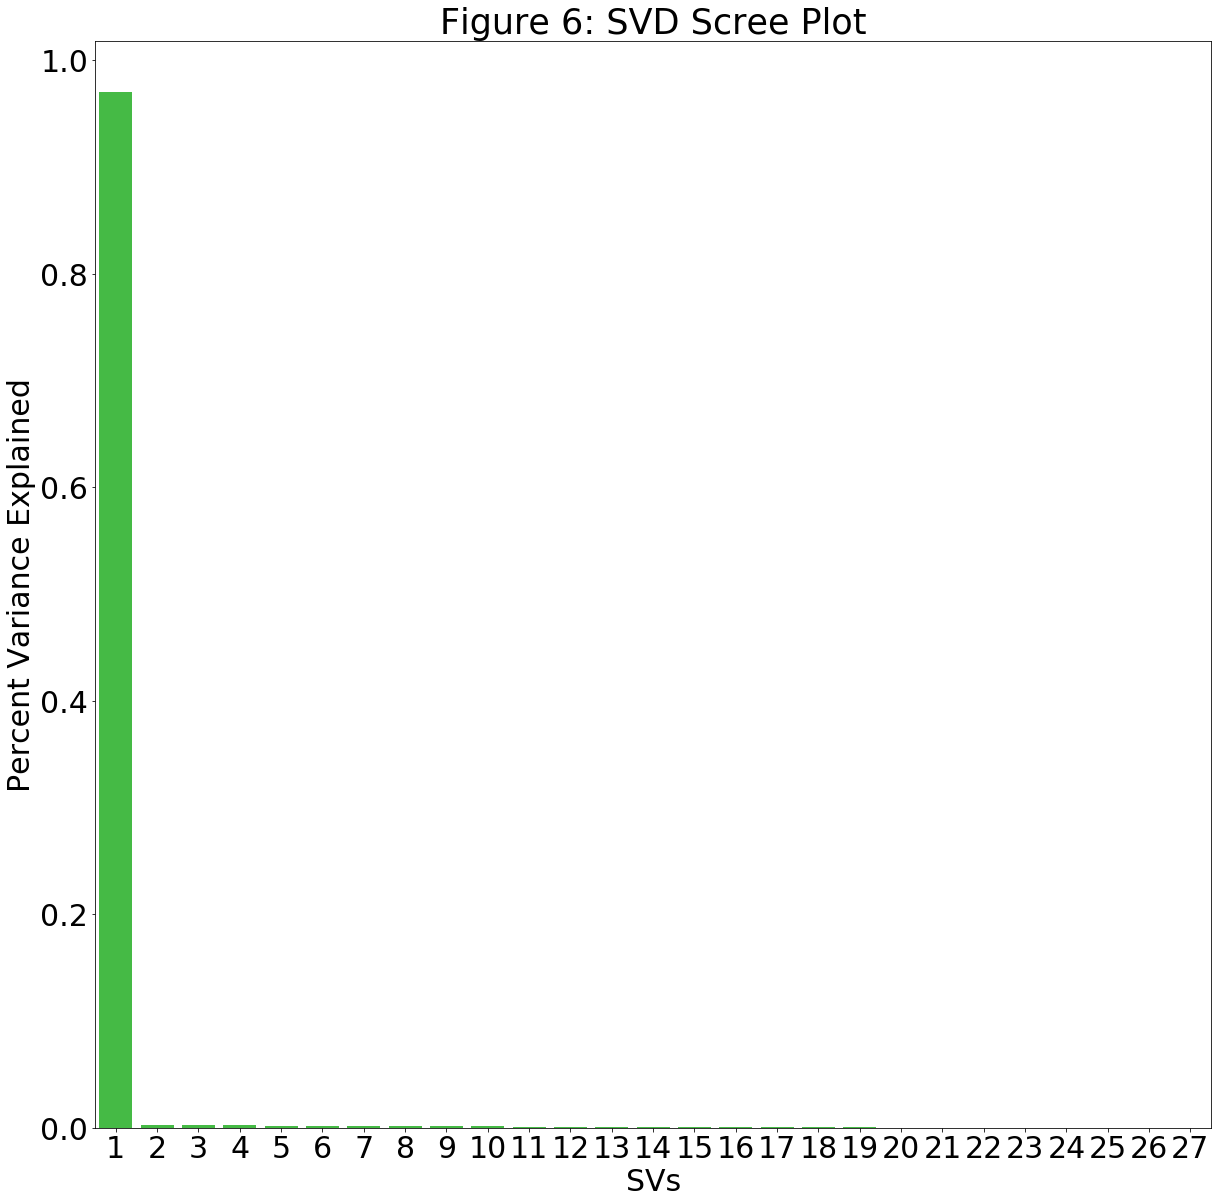

In [19]:
#Create scree plot to visualize the percent variance explained by each singular vector or PC to understand the structure of the text in the clean_reason column in the df_final dataset
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
var_explained

plt.figure(figsize=(20,20)) 
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('SVs', fontsize=30)
plt.ylabel('Percent Variance Explained', fontsize=30)
plt.title('Figure 6: SVD Scree Plot')
plt.savefig('svd_scree_plot.png',dpi=100)

In [20]:
#Create a data frame containing the first two singular vectors (PCs) and the meta data from the type column in the df_final dataset
labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=df_final["type"].tolist(), columns=labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Event Type'}, inplace=True)
svd_df.head()

,Event Type,SV1,SV2
0,Recall,-0.004768,-0.004017
1,Recall,-0.004197,-0.014375
2,Recall,-0.003349,0.005791
3,Recall,-0.002144,-0.006200
4,Recall,-0.001369,-0.001650


Text(0.5, 1.0, 'Figure 7: SVD Plot')

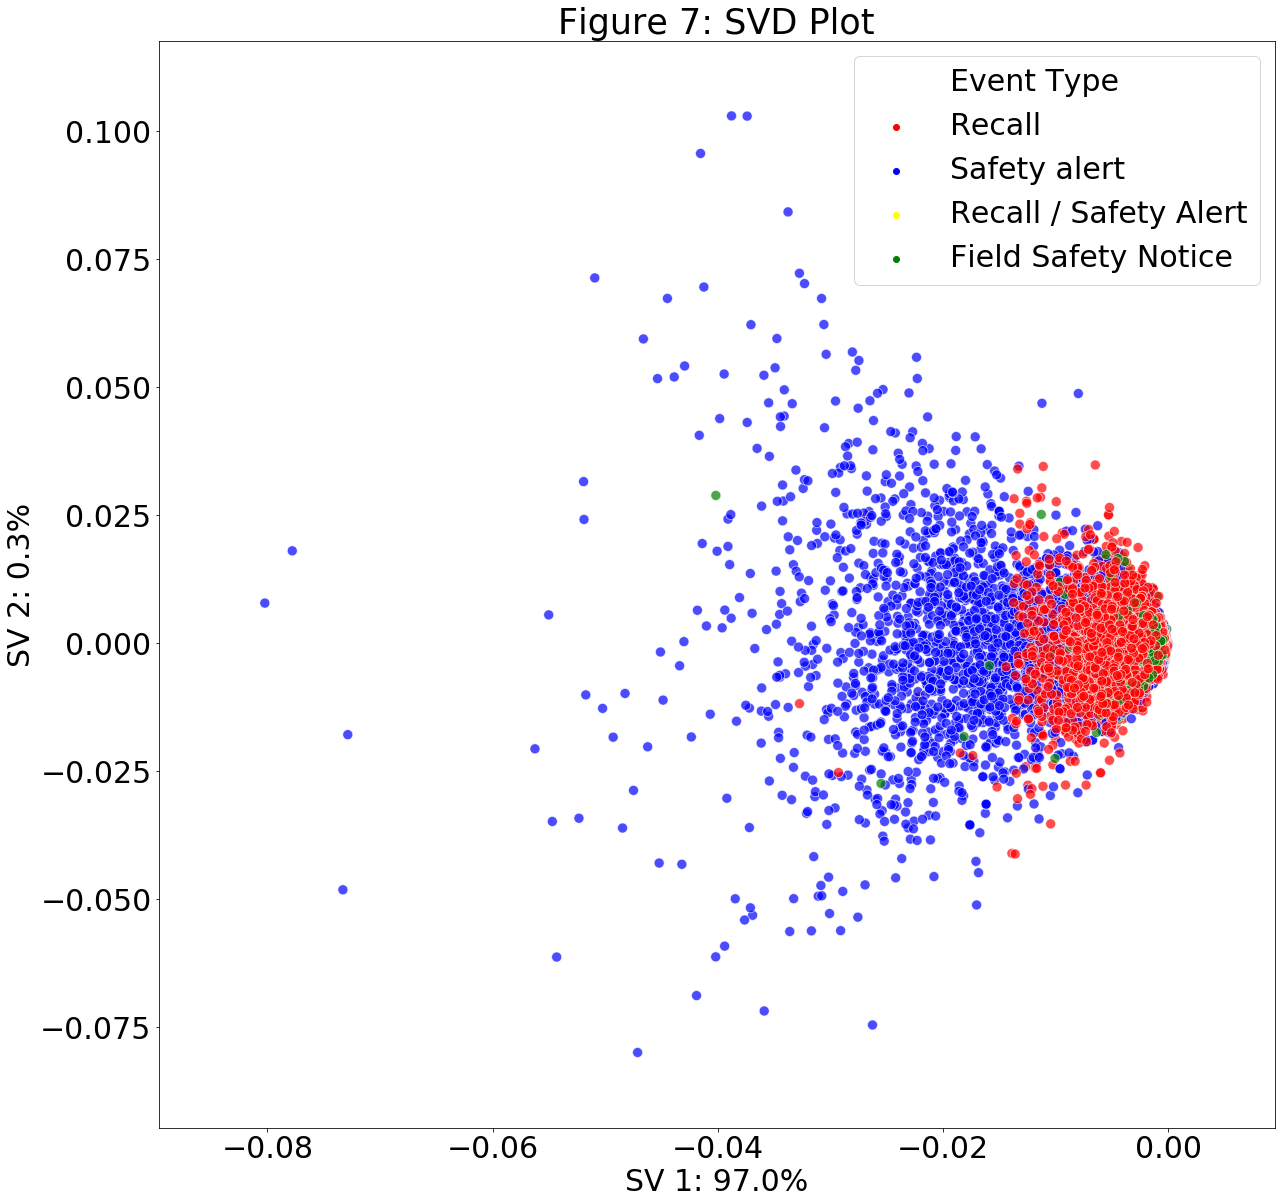

In [21]:
# specify colors for each event type
color_dict = dict({'Recall':'Red',
                   'Safety alert': 'Blue',
                   'Field Safety Notice': 'Green',
                   'Recall / Safety Alert': 'Yellow'})
# Scatter plot: SV1 and SV2
plt.figure(figsize=(20,20)) 
sns.scatterplot(x="SV1", y="SV2", hue="Event Type", 
                palette=color_dict, 
                data=svd_df, s=100,
                alpha=0.7)
plt.xlabel('SV 1: {0}%'.format(var_explained[0]*100), fontsize=30)
plt.ylabel('SV 2: {0}%'.format(var_explained[1]*100), fontsize=30)
plt.title('Figure 7: SVD Plot')